## 다항 회귀 - Polynomial Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

style.use('seaborn-talk')

krfont = {'family':'Malgun Gothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

In [28]:
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0,
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
              342.2, 360.8, 368.0, 391.2, 390.8])

In [29]:
# lr은 단순 선형 회귀 모델 pr은 다항 회귀 모델
lr = LinearRegression()
pr = LinearRegression()

In [30]:
# 다항 회귀를 위한 2차항 추가
# 다항 회귀르 ㄹ위한 필요한 차수만큼 항을 추가하기 위해 PolynomialFeatures()객체 생성
# 트레이닝 데이터 X를 PolynomialFeatures.fit_transform(X)로 변형
# 다항 회귀를 위해 2차항을 적용
quadratic = PolynomialFeatures(degree=2, include_bias=True)
# 트레이닝 데이터 X를 2차항이 적용된 다항 회귀 모델로 변형
X_quad = quadratic.fit_transform(X)

In [46]:
# 비교를 위해 단순 회귀 계산
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [47]:
# 다항 회귀를 위해 변형된 모델에 다중 회귀 모델 계산
pr.fit(X_quad, y)
# 계산된 회귀 모델로 좌표값 X_fit의 예측값을 계산
# 계산한 (X_fit, y_quad_fit)을 그래프에 그려주면 회귀 모델 그래프가 그려집니다.
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

In [48]:
# 단순 회귀 및 다항 회귀 모델의 예측값 계산
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [49]:
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)

In [50]:
print('MSE\tLinear: %.2f,\tQuadratic: %.2f' %(mse_lin, mse_quad))
print('R2\tLinear: %.2f,\tQuadratic: %.2f' %(r2_lin, r2_quad))

MSE	Linear: 569.78,	Quadratic: 61.33
R2	Linear: 0.83,	Quadratic: 0.98


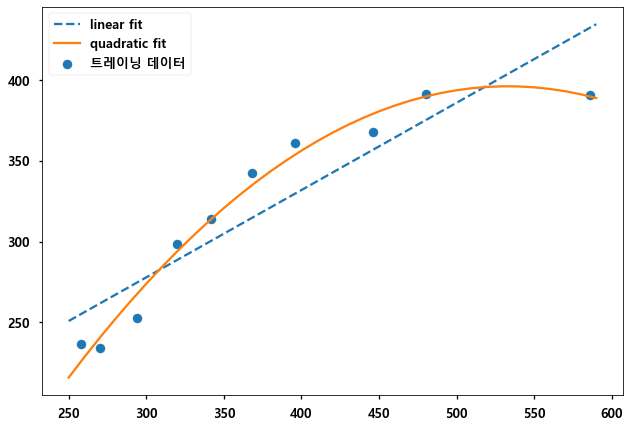

In [51]:
plt.scatter(X, y, label='트레이닝 데이터')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc=2)
plt.show()